In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# col_names=['age', 
#           'workclass',
#           'fnlwgt',
#           'education', 
#           'education_num', 
#           'marital_status', 
#           'occupation', 
#           'relationship', 
#           'race', 
#           'sex', 
#           'capital_gain', 
#           'capital_loss', 
#           'hours_per_week', 
#           'native_country',
#           'salary']

adult_dict = {
    'workclass': ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],
    'marital_status': ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
    'occupation': ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'],
    'relationship': ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'],
    'race': ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],
    'sex': ['Female', 'Male'],
    'native_country': ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'],
    'salary': ['>50K', '<=50K'],
}

In [3]:
dataset = pd.read_csv('new_dataset_fr.csv')

# dt_to_encode = dataset.drop(["age", "education_num", "hours_per_week"], axis=1)





In [4]:

def strip_col(dataset, dict):
    for key in dict.keys():
        dataset[key] = dataset[key].str.strip()
    return dataset

dataset_stripped = strip_col(dataset, adult_dict)



In [37]:
dataset_stripped.to_csv(r'C:\Users\Wojtek\OneDrive\Desktop\STRIVE SCHOOL\WojtekRepo\GROUP PROJECT\ADULT DATA\dataset_stripped.csv', index =False, header=True)

In [5]:
def translate(dataframe, dictionary):
    new_df = dataframe.copy()
    for key in dictionary.keys():
        for (index, val) in enumerate(dictionary[key]):
            new_df[key].loc[new_df[key] == val] = index
    new_df = new_df.apply(pd.to_numeric)
    return new_df

dt_encoded = translate(dataset_stripped, adult_dict)

dt_encoded

C:\Users\Wojtek\anaconda3\envs\dl\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,5,13,2,8,3,0,1,40,0,1
1,50,1,13,0,4,2,0,1,13,0,1
2,38,0,9,1,6,3,0,1,40,0,1
3,53,0,7,0,6,2,4,1,40,0,1
4,28,0,13,0,5,0,4,0,40,12,1
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,0,12,0,0,0,0,0,38,0,1
30158,40,0,9,0,7,2,0,1,40,0,0
30159,58,0,9,4,8,5,0,0,40,0,1
30160,22,0,9,2,8,1,0,1,20,0,1


# 1. Unsupervised Model LDA


In [21]:
X = dt_encoded.iloc[:, :-1]
y = dt_encoded.iloc[:, -1]

In [22]:
X

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,5,13,2,8,3,0,1,40,0
1,50,1,13,0,4,2,0,1,13,0
2,38,0,9,1,6,3,0,1,40,0
3,53,0,7,0,6,2,4,1,40,0
4,28,0,13,0,5,0,4,0,40,12
...,...,...,...,...,...,...,...,...,...,...
30157,27,0,12,0,0,0,0,0,38,0
30158,40,0,9,0,7,2,0,1,40,0
30159,58,0,9,4,8,5,0,0,40,0
30160,22,0,9,2,8,1,0,1,20,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [24]:
X_train.shape

(24129, 10)

In [25]:
#Normalazing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [32]:
#Applying LDL
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#run random classifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=10, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [36]:
#accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)*100))

[[ 778  772]
 [ 367 4116]]
Accuracy 81.12050389524283


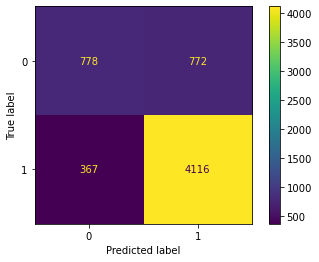

In [31]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test)

# 2. Supervised Model